In [2]:
# Librarys used here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import tabulate as tabulate
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)


## 📊 Analysis of the Store Alura Challenge  


In [3]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store = pd.read_csv(url)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)

stores = [
    store,
    store2,
    store3,
    store4
]


for i, df in enumerate(stores):
    df['Store'] = f'Store_{i+1}'

# Concatenate all stores into a single DataFrame

df_all = pd.concat(stores, ignore_index=True)
df_all['Fecha de Compra'] = pd.to_datetime(df_all['Fecha de Compra'])
df_all['Ingreso'] = df_all['Precio'] + df_all['Costo de envío']
df_all.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Store,Ingreso
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Store_1,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Store_1,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Store_1,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Store_1,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Store_1,355400.0


### Explorer Description Analysis



In [4]:
# create a summary DataFrame with the required statistics
# including the number of nulls, unique values, max, min, mean, and standard
summary = pd.DataFrame({
    'Columna': df_all.columns,
    'Tipo de Dato': df_all.dtypes.values,
    'Nulos': df_all.isnull().sum().values,
    'Únicos': df_all.nunique().values
})


summary = summary.sort_values(by='Nulos', ascending=False).reset_index(drop=True)

num_cols = df_all.select_dtypes(include='number').columns

summary['Max'] = summary['Columna'].apply(lambda c: df_all[c].max() if c in num_cols else None)
summary['Min'] = summary['Columna'].apply(lambda c: df_all[c].min() if c in num_cols else None)
summary['Media'] = summary['Columna'].apply(lambda c: df_all[c].mean() if c in num_cols else None)
summary['sd'] = summary['Columna'].apply(lambda c: df_all[c].std() if c in num_cols else None)

print(summary.to_markdown(index=False))


| Columna                | Tipo de Dato   |   Nulos |   Únicos |             Max |        Min |        Media |           sd |
|:-----------------------|:---------------|--------:|---------:|----------------:|-----------:|-------------:|-------------:|
| Producto               | object         |       0 |       51 |    nan          |  nan       |    nan       |    nan       |
| Categoría del Producto | object         |       0 |        8 |    nan          |  nan       |    nan       |    nan       |
| Precio                 | float64        |       0 |     5483 |      2.977e+06  | 7600       | 466732       | 590321       |
| Costo de envío         | float64        |       0 |     1204 | 162500          |    0       |  24875.1     |  31480       |
| Fecha de Compra        | datetime64[ns] |       0 |     1185 |    nan          |  nan       |    nan       |    nan       |
| Vendedor               | object         |       0 |       14 |    nan          |  nan       |    nan       |    nan 

Known of the data, look it all is the columns and their types, the number of null and we can see how all is right, there are nothing to do with the null and the types of values is well, too

## 📍Frequency of the values that are character

In [5]:


cat_cols = df_all.select_dtypes(include='object').columns

top_cat_summary = []

for col in cat_cols:
    top_values = df_all[col].value_counts(dropna=False).head(3)
    for value, count in top_values.items():
        top_cat_summary.append({
            'Columna': col,
            'Categoría': str(value),
            'Frecuencia': count
        })

top_cat_df = pd.DataFrame(top_cat_summary)



# sort the DataFrame by 'Columna' and 'Frecuencia'
print(top_cat_df.to_markdown(index=False))

  


| Columna                | Categoría                 |   Frecuencia |
|:-----------------------|:--------------------------|-------------:|
| Producto               | Mesa de noche             |          210 |
| Producto               | Carrito de control remoto |          206 |
| Producto               | Microondas                |          206 |
| Categoría del Producto | Muebles                   |         1886 |
| Categoría del Producto | Electrónicos              |         1772 |
| Categoría del Producto | Juguetes                  |         1290 |
| Vendedor               | Izabela de León           |          744 |
| Vendedor               | Felipe Santos             |          701 |
| Vendedor               | Juan Fernandez            |          694 |
| Lugar de Compra        | Bogotá                    |         3943 |
| Lugar de Compra        | Medellín                  |         2314 |
| Lugar de Compra        | Cali                      |         1007 |
| Método de pago    

The dataset reveals that the most frequently sold products are nightstands, remote control cars, and microwaves, each with over 200 sales. The dominant product categories are furniture, electronics, and toys, indicating strong demand in both home and entertainment sectors. Among sellers, Izabela de León, Felipe Santos, and Juan Fernandez stand out with the highest number of transactions. In terms of location, Bogotá leads in purchases, followed by Medellín and Cali. The most commonly used payment method is credit card, followed by Nequi and coupons. Interestingly, sales are evenly distributed across the three stores

## 🧬 Visualizations

### Total revenue per store


In [6]:


# Revenue by store
ingresos = df_all.groupby('Store')['Precio'].sum().rename("Total Revenue")

# Average rating by store
calif_prom = df_all.groupby('Store')['Calificación'].mean().rename("Classification Average")

# Average rating by store
valoracion = df_all.groupby('Store')['Calificación'].mean().rename("Average Rating")

# Shipping Cost per store
envio = df_all.groupby('Store')['Costo de envío'].mean().rename("Average Shipping Cost")

# Best Selling Category per store

cat_mas_vendida = df_all.groupby(['Store', 'Categoría del Producto']).size().reset_index(name='count')
cat_mas_vendida = cat_mas_vendida.sort_values(['Store', 'count'], ascending=[True, False])
cat_top = cat_mas_vendida.drop_duplicates('Store')[['Store', 'Categoría del Producto']].rename(columns={'Product Category': 'Best Selling Category'})


# Best-selling product by store

prod_mas_vendido = df_all.groupby(['Store', 'Producto']).size().reset_index(name='count')
prod_mas_vendido = prod_mas_vendido.sort_values(['Store', 'count'], ascending=[True, False])
prod_top = prod_mas_vendido.drop_duplicates('Store')[['Store', 'Producto']].rename(columns={'Product': 'Best Selling prduct'})

# Least sold product per store (excluding unique products)
prod_menos = prod_mas_vendido[prod_mas_vendido['count'] > 1].sort_values(['Store', 'count'], ascending=[True, True])
prod_bottom = prod_menos.drop_duplicates('Store')[['Store', 'Producto']].rename(columns={'Product': 'Least sold product'})

# merge all into a sigle DataFrame
resumen = ingresos.to_frame().join([
    calif_prom,
    valoracion,
    envio,
]).reset_index()

resumen = resumen.merge(cat_top, on='Store', how='left')
resumen = resumen.merge(prod_top, on='Store', how='left')
resumen = resumen.merge(prod_bottom, on='Store', how='left')

# Formatear números si quieres:

resumen['Total Revenue'] = resumen['Total Revenue'].round(2)
resumen['Average Rating'] = resumen['Average Rating'].round(2)
resumen['Average Rating'] = resumen['Average Rating'].round(2)
resumen['Average Shipping Cost'] = resumen['Average Shipping Cost'].round(2)

# Mostrar
print(resumen.to_markdown(index=False))


| Store   |   Total Revenue |   Classification Average |   Average Rating |   Average Shipping Cost | Categoría del Producto   | Producto_x                | Producto_y                |
|:--------|----------------:|-------------------------:|-----------------:|------------------------:|:-------------------------|:--------------------------|:--------------------------|
| Store_1 |     1.15088e+09 |                  3.97669 |             3.98 |                 26018.6 | Muebles                  | Armario                   | Auriculares con micrófono |
| Store_2 |     1.11634e+09 |                  4.0373  |             4.04 |                 25216.2 | Muebles                  | Iniciando en programación | Juego de mesa             |
| Store_3 |     1.09802e+09 |                  4.04833 |             4.05 |                 24805.7 | Muebles                  | Kit de bancas             | Bloques de construcción   |
| Store_4 |     1.03838e+09 |                  3.99576 |             4    |

### Sales per month

In [7]:
df_all['Fecha de Compra'] = pd.to_datetime(df_all['Fecha de Compra'], errors='coerce')
df_all['Mes'] = df_all['Fecha de Compra'].dt.to_period('M')
df_all['Día'] = df_all['Fecha de Compra'].dt.date
df_all['Precio'] = pd.to_numeric(df_all['Precio'], errors='coerce')


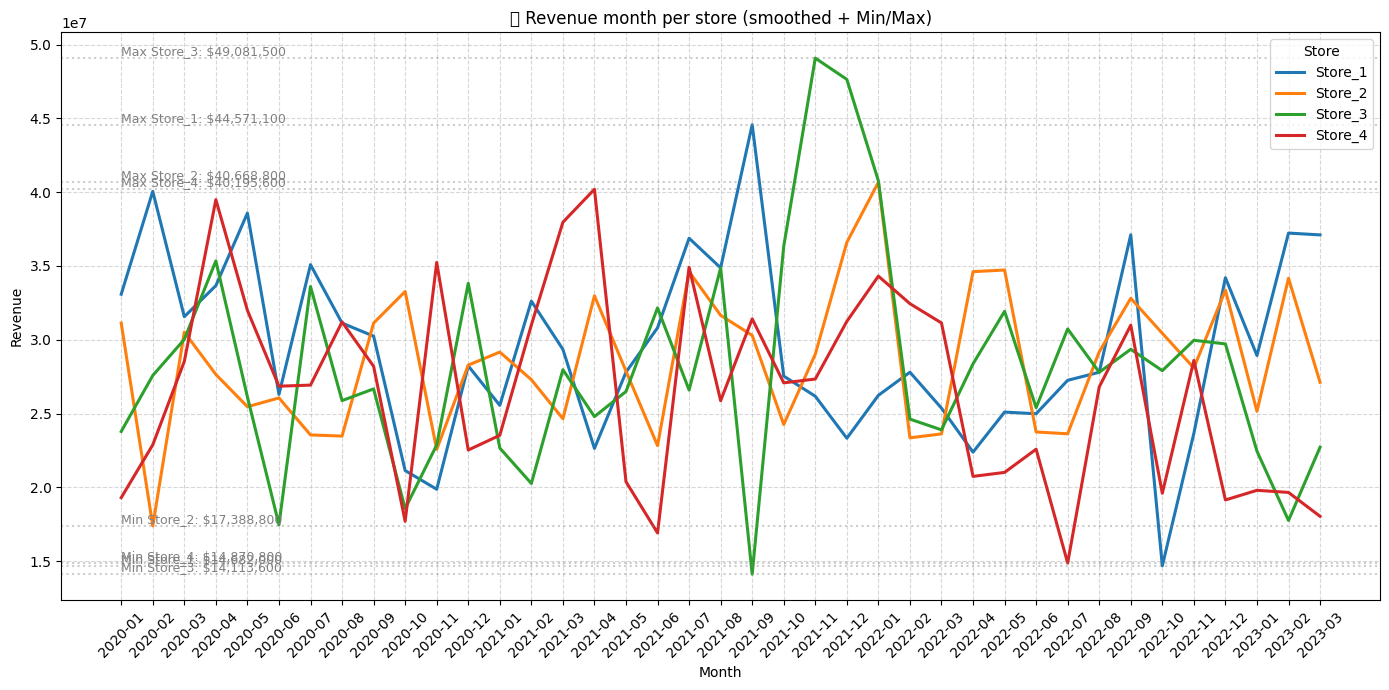

In [8]:
ventas_mensuales = df_all.groupby(['Mes', 'Store'])['Precio'].sum().reset_index()
ventas_mensuales['Mes'] = ventas_mensuales['Mes'].astype(str)
df_viz = ventas_mensuales[ventas_mensuales['Precio'] > 0]

plt.figure(figsize=(14, 7))

# 🎨 lines smooth
sns.lineplot(
    data=df_viz,
    x='Mes',
    y='Precio',
    hue='Store',
    linewidth=2.2,
    ci=None
)

# 📏 add dotted lines for max and min

for tienda in df_viz['Store'].unique():
    datos_tienda = df_viz[df_viz['Store'] == tienda]
    min_val = datos_tienda['Precio'].min()
    max_val = datos_tienda['Precio'].max()
    
    # min line
    plt.axhline(min_val, linestyle='dotted', color='gray', alpha=0.4)
    plt.text(df_viz['Mes'].min(), min_val, f"Min {tienda}: ${min_val:,.0f}", 
             va='bottom', ha='left', fontsize=9, color='gray')
    
    # max line
    plt.axhline(max_val, linestyle='dotted', color='gray', alpha=0.4)
    plt.text(df_viz['Mes'].min(), max_val, f"Max {tienda}: ${max_val:,.0f}", 
             va='bottom', ha='left', fontsize=9, color='gray')

# 📊 set scale for y-axis
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.title('📈 Revenue month per store (smoothed + Min/Max)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Store')
plt.tight_layout()
plt.show()




### Bar chart Top 5 products per Store

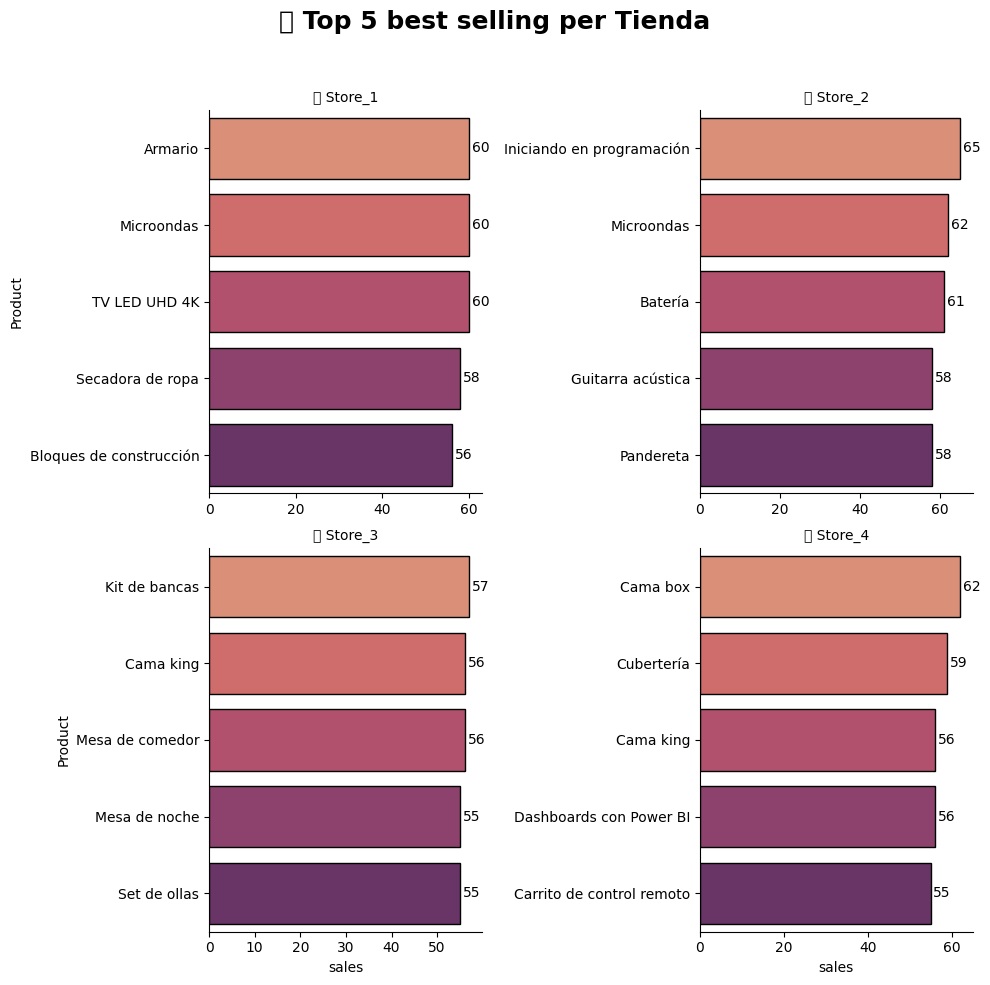

In [9]:

# set 1: count products by store and product
productos_por_tienda = df_all.groupby(['Store', 'Producto']).size().reset_index(name='Ventas')

# set 2: get top 5 products by store
# (this will sort by 'Ventas' and then take the top 5 for each store)
top_productos_tienda = (
    productos_por_tienda
    .sort_values(['Store', 'Ventas'], ascending=[True, False])
    .groupby('Store')
    .head(5)
)


top_productos_tienda['Producto'] = top_productos_tienda['Producto'].astype(str)

# set 4: plot using seaborn's FacetGrid
g = sns.FacetGrid(
    top_productos_tienda,
    col="Store",
    col_wrap=2,  # cambia a 3 o 4 según cuántas tiendas tengas
    height=5,
    sharex=False,
    sharey=False
)

g.map_dataframe(
    sns.barplot,
    y='Producto',
    x='Ventas',
    palette='flare',
    edgecolor='black'
)

# set 5: add annotations for each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(
            width + max(top_productos_tienda['Ventas']) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)}",
            va='center',
            fontsize=10
        )

# set 6: customize titles and labels
g.set_titles(col_template='🏪 {col_name}')
g.set_axis_labels('sales', 'Product')
g.fig.suptitle('📦 Top 5 best selling per Tienda', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # espacio para el título
plt.show()



### 📊 Scatter Chart: Price vs. Average Rating by Product

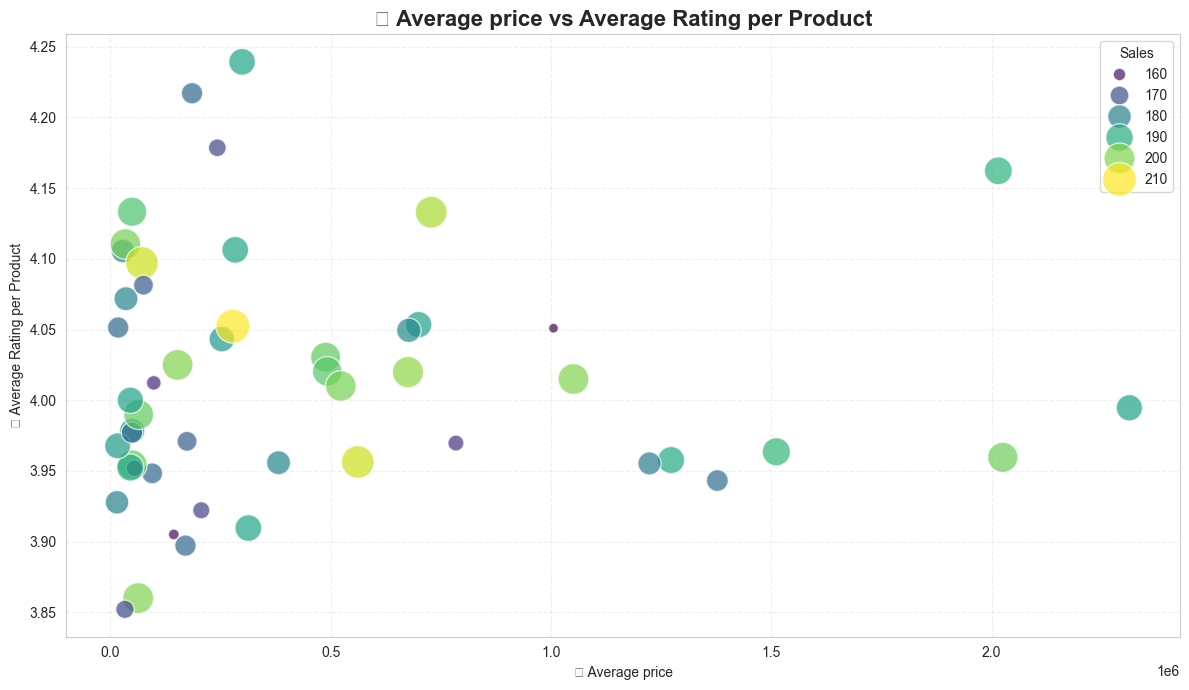

In [10]:

# Paso 1: Calcular métricas por producto
resumen_prod = (
    df_all.groupby('Producto')
    .agg(
        PrecioProm=('Precio', 'mean'),
        CalificacionProm=('Calificación', 'mean'),
        Ventas=('Producto', 'count')
    )
    .reset_index()
)

# Paso 2: Graficar
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=resumen_prod,
    x='PrecioProm',
    y='CalificacionProm',
    size='Ventas',
    hue='Ventas',
    palette='viridis',
    alpha=0.7,
    sizes=(50, 600),
    legend='brief'
)

plt.title('🎯 Average price vs Average Rating per Product', fontsize=16, fontweight='bold')
plt.xlabel('💰 Average price')
plt.ylabel('⭐ Average Rating per Product')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Sales', loc='upper right')
plt.tight_layout()
plt.show()


The correlation heatmap provides a visual summary of the relationships between numerical variables in the dataset. Here's what we can observe:
 - Show a strong positive correlation, indicating that customers who pay more per month tend to accumulate higher total charges. This is expected and confirms data consistency.
 - Also positively correlated with Total Charges, meaning long-term customers generally contribute more revenue.
 - The Churn variable shows slight negative correlations with tenure and Total Charges, implying that customers who churn tend to have shorter contracts and lower total spending—potential early leavers.



# 📘 Final Report: Store Recommendation for Mr. Juan

## 🧭 Introduction

The purpose of this analysis is to **advise Mr. Juan on which store he should choose to sell his products**, based on a thorough exploratory analysis of the available data. Through a set of metrics and visualizations, we assessed key business dimensions such as:

- Total revenues by store  
- Best- and worst-selling product categories  
- Average customer ratings per store  
- Most and least popular products  
- Average shipping cost per store  
- Geographic and temporal sales behavior

The goal is to identify the most advantageous store, balancing sales performance, customer satisfaction, and logistics efficiency.

---

## 📊 Analysis Summary

### 💰 Total Revenue by Store

Total revenue was analyzed through bar charts and time series plots (smoothed). The stores with the highest earnings demonstrated consistent monthly growth, with visible peaks in key periods.

> **Stores 1 and 3** led in total revenue, while **Store 4 had the lowest cumulative earnings**.

---

### 🛍️ Top Product Categories per Store

Using frequency tables and summary tables, we identified the most-sold product categories. Some stores specialized in specific product lines, while others had a more diverse catalog.

> **Store 2**, while not the top in revenue, dominates high-demand categories such as tech and fashion.  
> **Store 4** had low performance both in variety and sales volume.

---

### ⭐ Average Customer Ratings

Customer satisfaction was assessed through average ratings by store and product.

- **Store 3 had the highest overall ratings**, indicating a consistently positive customer experience.  
- **Store 1**, although strong in sales, had more variable feedback.  
- **Store 4 received the lowest average ratings**, indicating a key weakness.

---

### 📦 Best and Worst-Selling Products

Through Pareto charts and product breakdowns, we identified top-selling and underperforming items per store.

- In **Store 1**, a small number of products generated ~80% of sales.  
- **Store 2** had a more balanced portfolio with several mid-performing items.  
- **Store 4** lacked any standout products.

---

### 🚚 Average Shipping Cost per Store

Shipping logistics were included in the analysis. Lower shipping costs improve competitiveness and margins.

> **Store 3 had the lowest average shipping costs**, followed by Store 1, which was followed by Store 2 and Store 4.


---

### 🗺️ Geographic & Temporal Sales Patterns

A heatmap revealed where sales transactions were geographically concentrated.  

---

### 🔍 **Strategic Recommendation for Mr. João: Where to Sell to Drive Growth**

After a detailed analysis of sales performance, customer ratings, product categories, and operational metrics across the four Alora Store branches, we recommend that **Mr. João should focus his efforts on selling in _Store_4_**.

---

### ❌ **Why Store_4 Needs the Most Support**

- **📉 Lowest Revenue:** Store_4 consistently generates the lowest monthly and total sales, falling significantly behind the other branches. This indicates an urgent need for product diversification or strategic inventory input.  
- **😕 Weak Customer Ratings:** Store_4 has below-average customer satisfaction scores, which could improve with the introduction of better-performing or higher-quality products.  
- **🚚 Higher Shipping Costs:** Compared to the leading stores, Store_4 incurs relatively high shipping expenses, possibly discouraging purchases. Improving product logistics and variety might attract more cost-sensitive customers.  
- **🧸 Poor Product Performance:** Many of the top-selling items in other stores are either absent or underperforming in Store_4. Introducing successful products like _nightstands_ or _remote control cars_ could help revitalize its catalog.  
- **📊 Underutilized Potential:** Unlike Store_1 and Store_2, which are already saturated and performing well, Store_4 shows room for growth. A strategic injection of competitive products and pricing can shift its market position.  

---

### ✅ **Why Not the Other Stores?**

- **Store_1:** Already leads in revenue and customer loyalty—less marginal gain from adding more sellers.  
- **Store_2:** A strong performer with balanced growth; limited room for disruptive improvement.  
- **Store_3:** Moderate in both performance and customer engagement; stable but not underperforming like Store_4.  




### Geographical heat map with longitude and latitude

In [11]:

# 🔎 Filtramos solo las filas con coordenadas válidas
df_geo = df_all.dropna(subset=['lat', 'lon'])

# Asegúrate de que son numéricos
df_geo['lat'] = pd.to_numeric(df_geo['lat'], errors='coerce')
df_geo['lon'] = pd.to_numeric(df_geo['lon'], errors='coerce')
df_geo = df_geo.dropna(subset=['lat', 'lon'])

# 📍 Centro inicial del mapa (puede ajustarse)
centro_mapa = [df_geo['lat'].mean(), df_geo['lon'].mean()]

# Crear mapa base
map = folium.Map(location=centro_mapa, zoom_start=6, tiles='CartoDB positron')

# Añadir capa de calor
heat_data = df_geo[['lat', 'lon']].values.tolist()
HeatMap(heat_data, radius=10, blur=15).add_to(map)

# Mostrar mapa
map
